In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:

df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
# num_col = ['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']
num_col = [col for col in (df.select_dtypes(include = 'number').columns.tolist()) if df[col].nunique()> 5]
# WE CAN ONLY PERFORM EDA FOR NUMERICAL COLUMNS

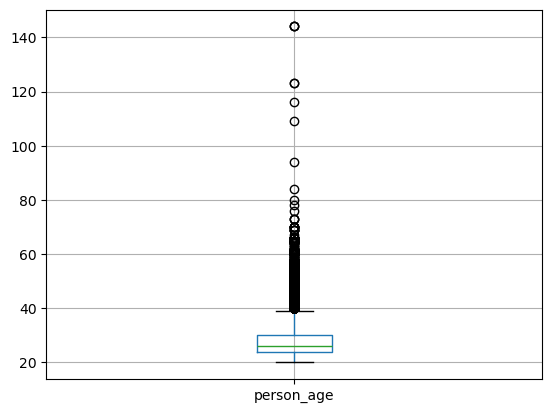

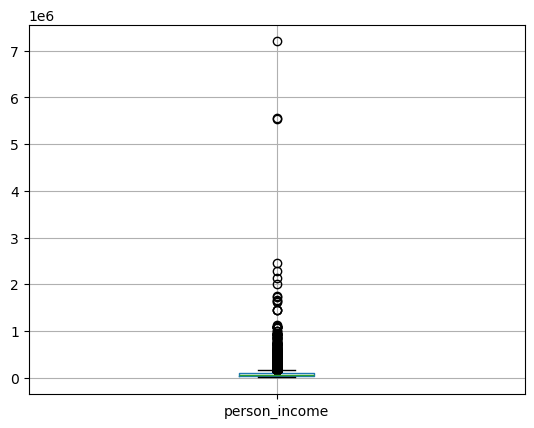

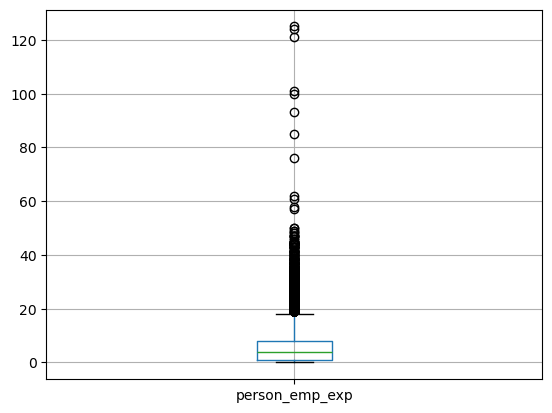

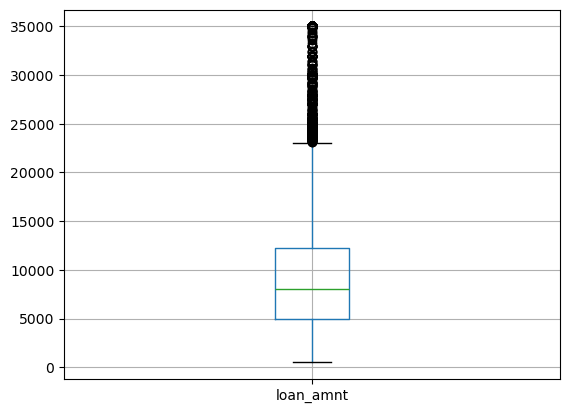

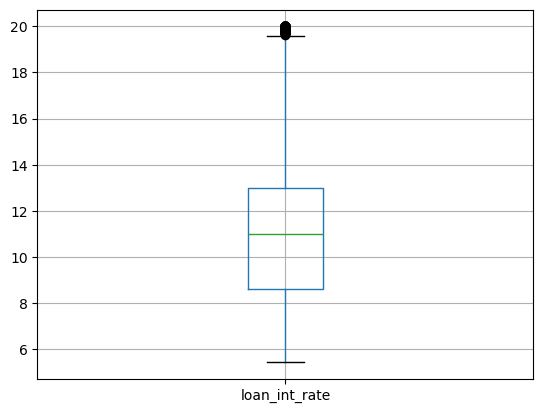

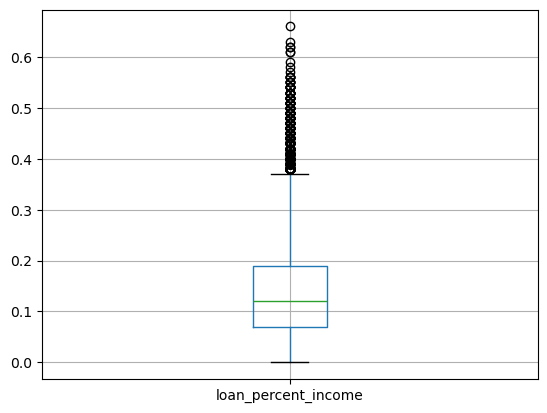

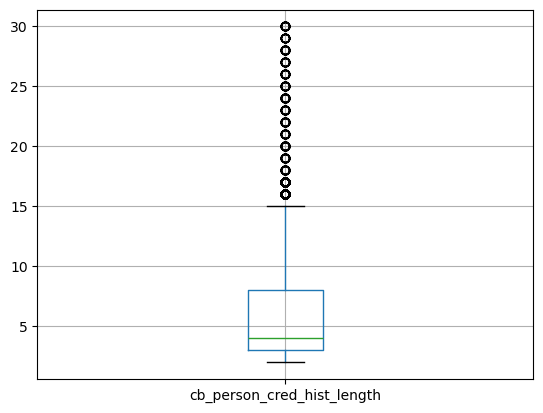

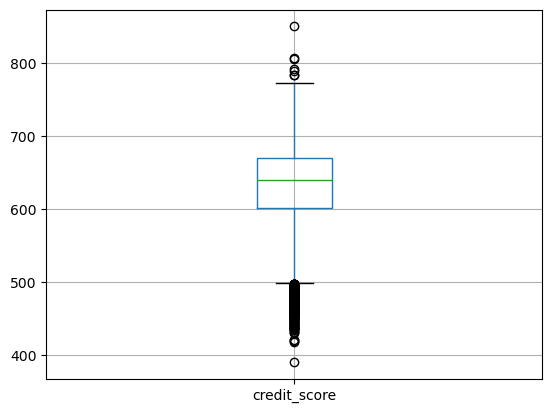

In [11]:
for col in num_col:
    df.boxplot(column = col)
    plt.show()


In [12]:
df_cleaned = df.copy()
for col in num_col:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f" IQR {col} is {IQR} ")
    print(f"The sum of zeroes in {col} is {df_cleaned[col].isnull().sum()} ")
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
# Outliers are when  < q1 + 1.5 * iqr or iqr + 1.5 * q3  > 

 IQR person_age is 6.0 
The sum of zeroes in person_age is 0 
 IQR person_income is 47912.0 
The sum of zeroes in person_income is 0 
 IQR person_emp_exp is 6.0 
The sum of zeroes in person_emp_exp is 0 
 IQR loan_amnt is 7000.0 
The sum of zeroes in loan_amnt is 0 
 IQR loan_int_rate is 4.49 
The sum of zeroes in loan_int_rate is 0 
 IQR loan_percent_income is 0.09999999999999999 
The sum of zeroes in loan_percent_income is 0 
 IQR cb_person_cred_hist_length is 4.0 
The sum of zeroes in cb_person_cred_hist_length is 0 
 IQR credit_score is 68.0 
The sum of zeroes in credit_score is 0 


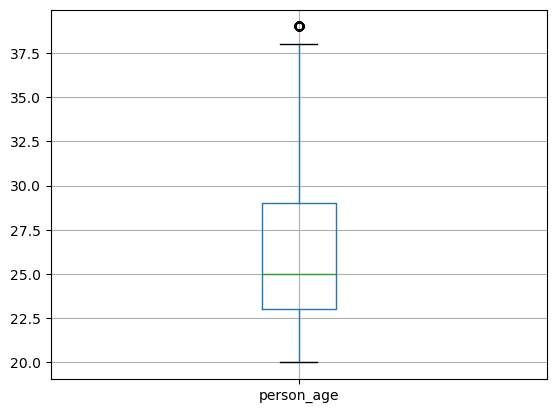

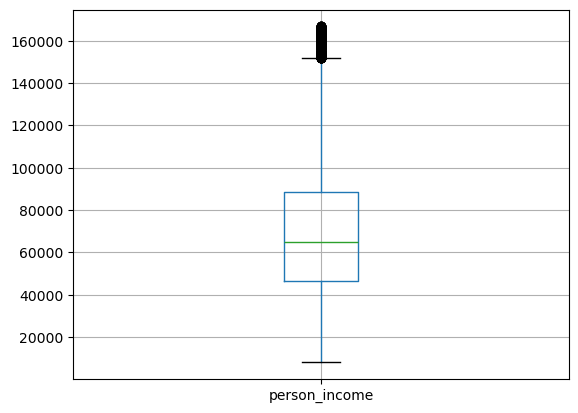

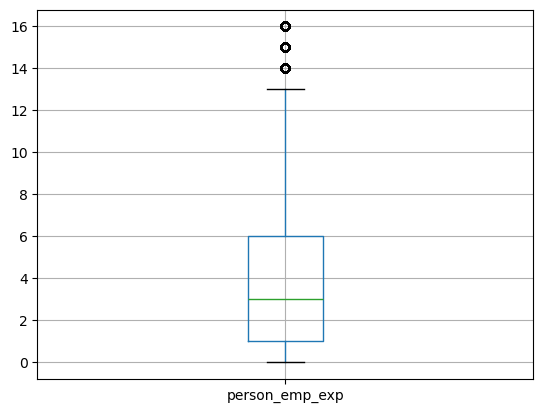

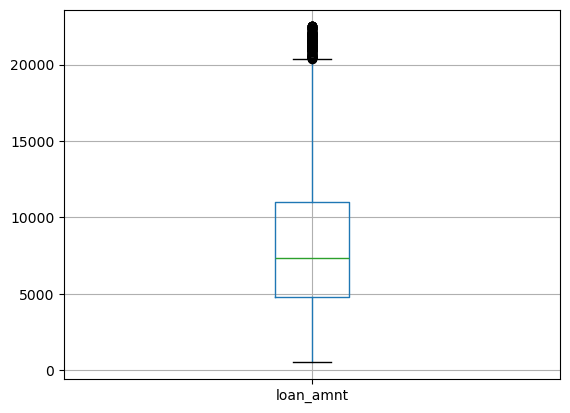

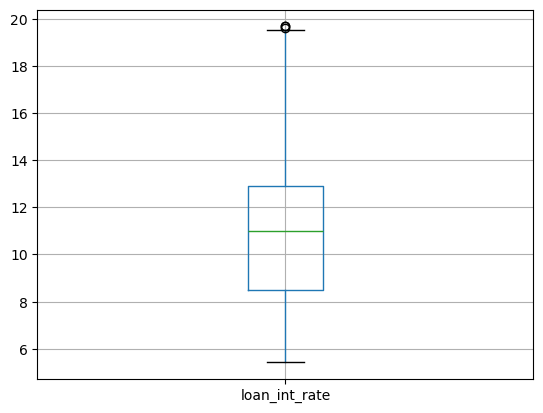

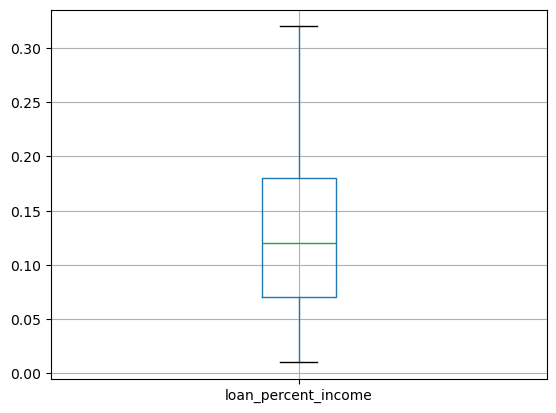

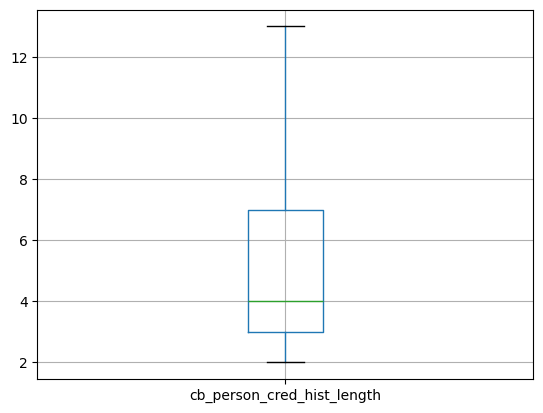

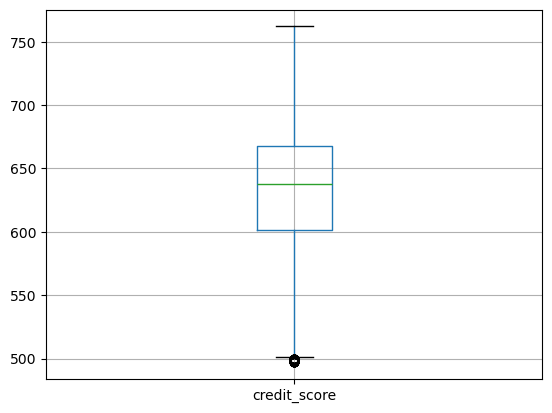

In [13]:
for col in num_col:
    df_cleaned.boxplot(column = col)
    plt.show()
    

In [19]:
df_cleaned

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
23,24.0,female,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3.0,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1


In [21]:
df_cleaned.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000
mean,26.404631,70058.799335,4.071538,8276.245529,10.881279,0.129732,4.998087,632.102703,0.202107
std,3.867338,31562.837789,3.878033,4782.254222,2.927990,0.071587,2.649725,47.684452,0.401577
min,20.000000,8000.000000,0.000000,500.000000,5.420000,0.010000,2.000000,497.000000,0.000000
25%,23.000000,46458.000000,1.000000,4800.000000,8.490000,0.070000,3.000000,601.000000,0.000000
50%,25.000000,64796.000000,3.000000,7350.000000,11.010000,0.120000,4.000000,638.000000,0.000000
75%,29.000000,88578.000000,6.000000,11026.000000,12.910000,0.180000,7.000000,668.000000,0.000000
max,39.000000,166754.000000,16.000000,22500.000000,19.690000,0.320000,13.000000,762.000000,1.000000


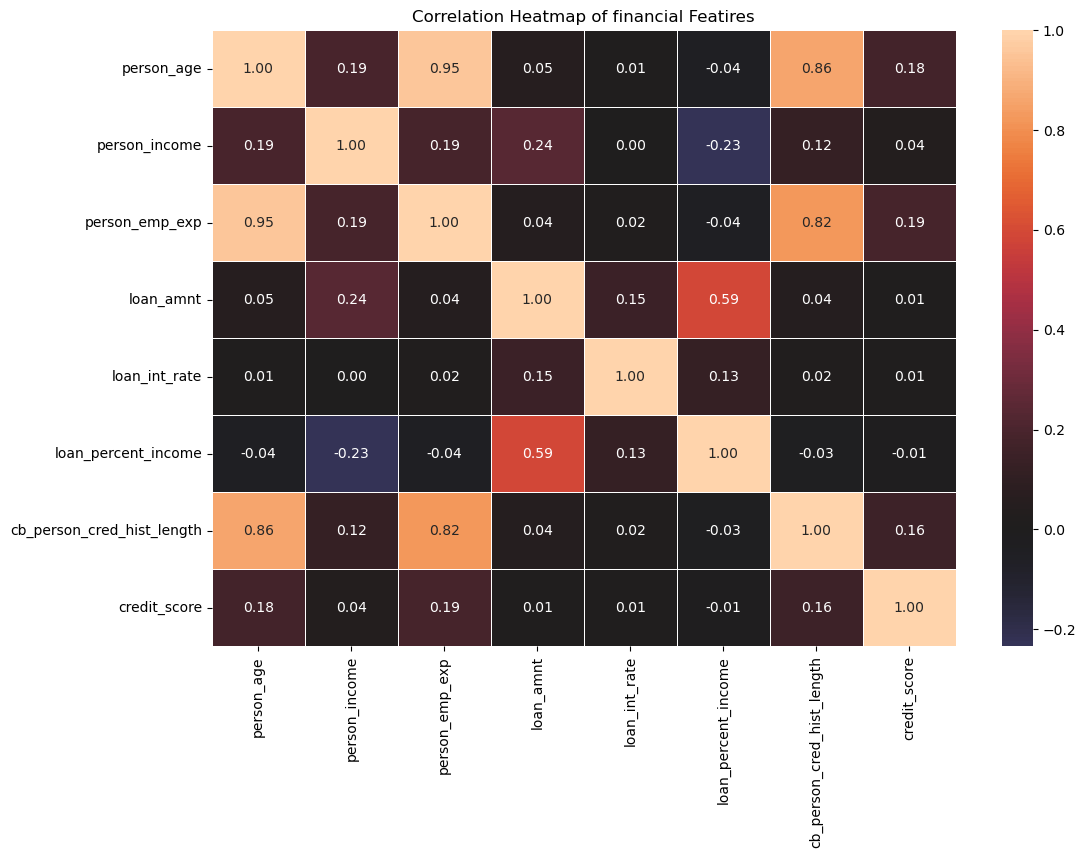

In [23]:
import seaborn as sns
corr_matrix = df[num_col].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix,annot = True,fmt = ".2f",center = 0,linewidths = 0.5)
plt.title("Correlation Heatmap of financial Featires")
plt.show()

In [24]:
#Scaling was performed using standardization to bring all features to a common scale and improve model performance.

In [49]:
X = df_cleaned.drop(columns = ['loan_status'])
y = df_cleaned['loan_status']

In [51]:
X1 = df.drop(columns = ['loan_status'])
y1 = df['loan_status']

In [53]:
num_col = X.select_dtypes(include=['int64', 'float64']).columns
cat_col = X.select_dtypes(include=['object']).columns

In [55]:
num_col1 = X1.select_dtypes(include=['int64', 'float64']).columns
cat_col1 = X1.select_dtypes(include=['object']).columns

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col1),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col1)
    ]
)

X1_train_processed = preprocessor1.fit_transform(X1_train)
X1_test_processed = preprocessor1.transform(X1_test)


In [131]:
# Cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ]
)

X_train_processed = preprocessor2.fit_transform(X_train)
X_test_processed = preprocessor2.transform(X_test)



In [133]:
#logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 100)

lr.fit(X_train_processed,y_train)

y_pred_lr = lr.predict(X_test_processed)


In [137]:
lr1 = LogisticRegression(max_iter = 100)

lr1.fit(X1_train_processed,y1_train)

y1_pred_lr = lr1.predict(X1_test_processed)

In [139]:
# Support Vector Machine

In [141]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_processed, y_train)

y_pred_svm = svm.predict(X_test_processed)


In [143]:
svm1 = SVC(kernel='rbf', probability=True)
svm1.fit(X1_train_processed, y1_train)

y1_pred_svm = svm1.predict(X1_test_processed)


In [145]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train_processed, y_train)

y_pred_dt = dt.predict(X_test_processed)

In [147]:
dt1 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt1.fit(X1_train_processed, y1_train)

y1_pred_dt = dt1.predict(X1_test_processed)

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_processed, y_train)

y_pred_rf = rf.predict(X_test_processed)


In [151]:
rf1 = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf1.fit(X1_train_processed, y1_train)
y1_pred_rf = rf1.predict(X1_test_processed)

In [161]:
from sklearn.metrics import accuracy_score

In [167]:
print("This the accuracy with removal of outliers by EDA(iqr) method")
print("LR :", accuracy_score(y_test, y_pred_lr))
print("SVM:", accuracy_score(y_test, y_pred_svm))
print("DT :", accuracy_score(y_test, y_pred_dt))
print("RF :", accuracy_score(y_test, y_pred_rf))

This the accuracy with removal of outliers by EDA(iqr) method
LR : 0.896159711631776
SVM: 0.9151531956190212
DT : 0.9148759184805213
RF : 0.9251351726050188


In [169]:
print("This the accuracy for raw data set")
print("LR :", accuracy_score(y1_test, y1_pred_lr))

print("SVM:", accuracy_score(y1_test, y1_pred_svm))
print("DT :", accuracy_score(y1_test, y1_pred_dt))
print("RF :", accuracy_score(y1_test, y1_pred_rf))

This the accuracy for raw data set
LR : 0.8945555555555555
SVM: 0.9163333333333333
DT : 0.9205555555555556
RF : 0.9291111111111111


In [368]:
new_data = pd.DataFrame([{
    # 🔢 Numerical
    'person_age': 21,
    'person_income': 12282,
    'person_emp_exp': 0,
    'loan_amnt': 1050,
    'loan_int_rate': 11.14,
    'loan_percent_income': 0.08,
    'credit_score': 504,
    'cb_person_cred_hist_length': 2,

    # 🧾 Categorical
    'person_gender': 'Female',
    'person_education': 'High School',
    'person_home_ownership': 'OWN',
    'loan_intent': 'EDUCATION',
    'previous_loan_defaults_on_file': 'Y'
}])

In [366]:
new_data_processed = preprocessor1.transform(new_data)
prediction = rf.predict(new_data_processed)[0]
print(rf.predict_proba(new_data_processed))
print(prediction)

[[0.9 0.1]]
0


In [354]:
if prediction == 1:
    print("Loan Approved ✅")
else:
    print("Loan Rejected ❌")

Loan Rejected ❌


In [344]:
y_train_pred_rf = rf.predict(X_train_processed)


In [346]:
y_test_pred_rf = rf.predict(X_test_processed)

In [348]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred_rf))

Train Accuracy: 1.0
Test  Accuracy: 0.9251351726050188


In [370]:
import joblib

joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(preprocessor1,"preprocessor.pkl")

['preprocessor.pkl']